In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['font.family'] = 'Gulim'

In [2]:
df = pd.read_csv('https://bit.ly/3RhoNho')

In [3]:
# df의 정보 확인하기
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401682 entries, 0 to 401681
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   번호           401682 non-null  int64  
 1   도서명          401279 non-null  object 
 2   저자           401481 non-null  object 
 3   출판사          396887 non-null  object 
 4   발행년도         401665 non-null  object 
 5   ISBN         401682 non-null  object 
 6   세트 ISBN      61871 non-null   object 
 7   부가기호         325034 non-null  object 
 8   권            68267 non-null   object 
 9   주제분류번호       381360 non-null  object 
 10  도서권수         401682 non-null  int64  
 11  대출건수         401682 non-null  int64  
 12  등록일자         401682 non-null  object 
 13  Unnamed: 13  0 non-null       float64
dtypes: float64(1), int64(3), object(10)
memory usage: 42.9+ MB


,번호,도서권수,대출건수,Unnamed: 13
count,401682.000000,401682.000000,401682.000000,0.0
mean,200841.500000,1.127130,10.954300,NaN
std,115955.749751,0.498039,17.836878,NaN
min,1.000000,0.000000,0.000000,NaN
25%,100421.250000,1.000000,1.000000,NaN
50%,200841.500000,1.000000,5.000000,NaN
75%,301261.750000,1.000000,14.000000,NaN
max,401682.000000,40.000000,1468.000000,NaN


In [4]:
# df의 마지막 행 삭제하기
df = df.iloc[:,:-1]

In [5]:
# 발행년도별 발행부수의 합 확인하기
new_df = df.발행년도.value_counts().reset_index()
new_df.columns=['발행년도','발행부수']

In [6]:
# 년도를 4자리로 자르기 - 4자리가 숫자가 아니거나 1945~2023 사이에 없으면 삭제하기
rmv_idx = [ ]
for idx, val in new_df.발행년도.items():
    try:
        if int(val) >= 2023 or int(val) <= 1945:
            rmv_idx.append(idx)
    except:
        rmv_idx.append(idx)
new_df.drop(rmv_idx,0,inplace=True)

In [7]:
# 발행년도를 int 타입으로 바꾸고 정렬하기
new_df.발행년도 = new_df.발행년도.astype(int)
tidy_df = new_df.sort_values(by='발행년도')

In [8]:
# 발행년도를 인덱스로 바꾸기
last_df = tidy_df.set_index('발행년도')

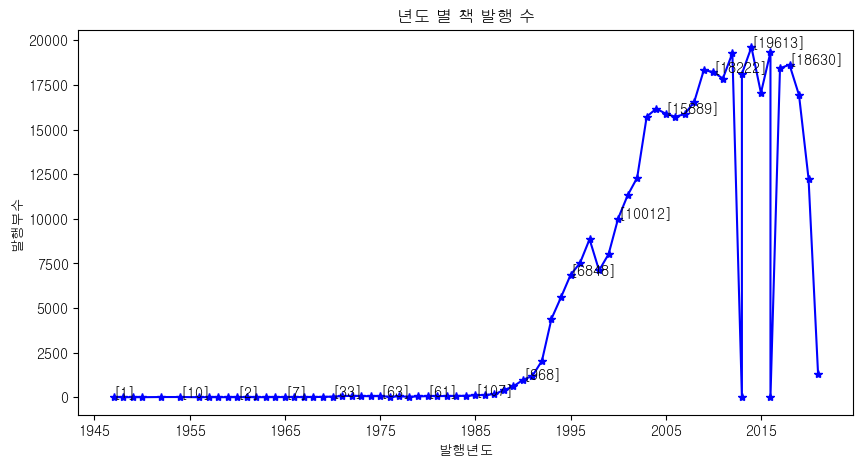

In [9]:
# 플롯 그래프 그리기
plt.figure(figsize=(10,5))
plt.plot(last_df, '*-b')
plt.title("년도 별 책 발행 수")
plt.xlabel("발행년도")
plt.ylabel("발행부수")
plt.xticks(range(1945,2024,10))
for idx, val in zip(last_df.index[::5],last_df.values[::5]):
    plt.annotate(val,(idx,val))
plt.show()

In [10]:
# 주제분류번호별 건수 조정
new_df1 = df.copy()

In [11]:
# na 없애기
new_df1.fillna("X",inplace=True)

In [12]:
# 주제분류번호 앞자리만 따서 그룹묶고 정렬하기
new_df2 = new_df1.주제분류번호.str[:1].value_counts().sort_index().reset_index()

In [13]:
# 컬럼 이름 바꾸기
new_df2.columns=(['주제분류번호','건수'])

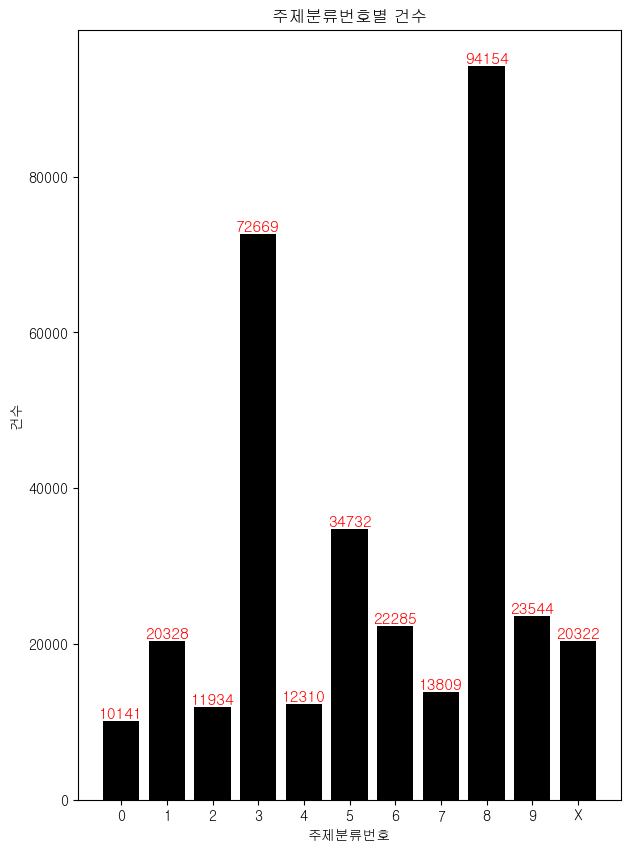

In [14]:
# 바 그래프 그리기
plt.figure(figsize=(7,10))
plt.bar(new_df2.주제분류번호,new_df2.건수,color='black')
plt.title('주제분류번호별 건수')
plt.xlabel('주제분류번호')
plt.ylabel('건수')
for idx, val in zip(new_df2.주제분류번호,new_df2.건수):
    plt.annotate(val,(idx,val),xytext=(0,2),textcoords='offset points',color='red',ha='center',fontsize=11)

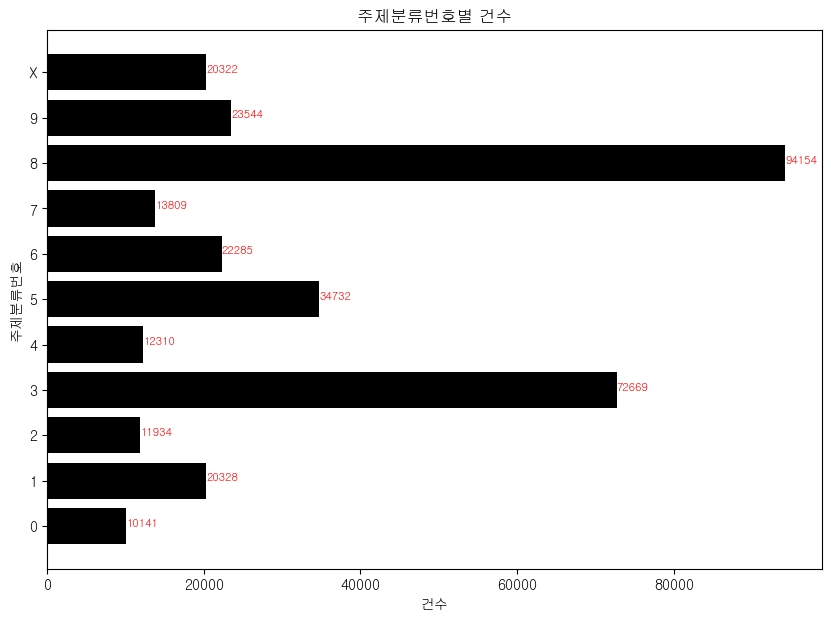

In [15]:
# 세로형 바 그래프 그리기
plt.figure(figsize=(10,7))
plt.barh(new_df2.주제분류번호,new_df2.건수,color='black')
plt.title('주제분류번호별 건수')
plt.xlabel('건수')
plt.ylabel('주제분류번호')
for idx, val in zip(new_df2.주제분류번호,new_df2.건수):
    plt.annotate(val,(val,idx),color='red',fontsize=8)
plt.savefig('Rdata0914.jpg')
plt.show()

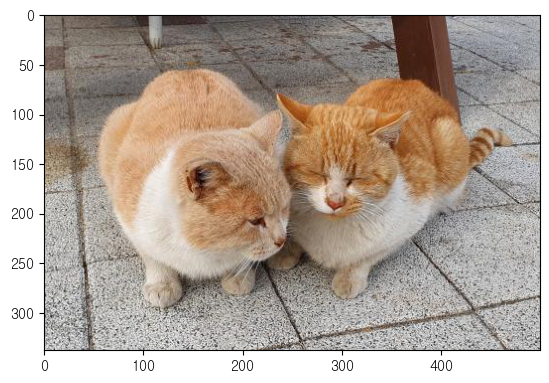

In [19]:
# 이미지 출력하고 저장하기
img = plt.imread('cat.jpg')
plt.imshow(img)

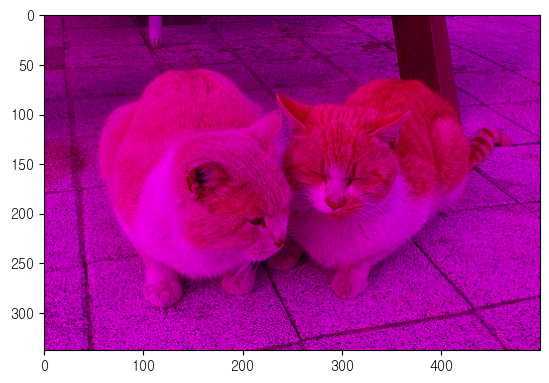

In [20]:
# 이미지 색 바꾸기
img1 = img.copy()
img1[:,:,1] = 0
plt.imshow(img1)

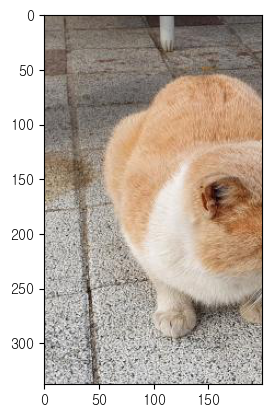

In [23]:
# 이미지 크기대로 자르기
plt.imshow(img[:400,:200,:])

In [24]:
# 위에서 생성한 그래프 이미지로 저장하기

In [25]:
df

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401677,401678,韓國現代詩大系,채만묵 編著,한국문화사,1996,9788977352971,9788977352988.0,NaN,3,811.608,1,0,1970-01-01
401678,401679,뉴 웨이브,제임스 모나코 지음,한나래,1996,9788985367448,9788985367424.0,NaN,2,688.04,1,0,1970-01-01
401679,401680,(최인훈 장편소설)화두,최인훈 지음,민음사,1994,9788937401596,9788937401589.0,NaN,2,813.6,1,0,1970-01-01
401680,401681,독일 문학과 세계 문학,吳漢鎭 編著,벽호,1995,9788947700368,9788947700405.0,NaN,3,809.05,2,0,1970-01-01


In [26]:
# 출판사별 발행년도별 발행부수 산점도 그리기 (상위 30개 출판사만)
new_df3 = df.copy()

In [27]:
# 각각 칼럼의 na 값 지우기
new_df3 = new_df3.loc[~new_df3.출판사.isna(),:]
new_df3 = new_df3.loc[~new_df3.발행년도.isna(),:]

In [28]:
# 상위 출판사 30개 골라내기
T30 = new_df3.출판사.value_counts()[:30].index
new_df3 = new_df3.loc[new_df3.출판사.isin(T30),:]

In [29]:
# 인덱스 다시 맞추기
new_df3.index = np.arange(new_df3.shape[0])

In [30]:
# 발행년도가 2000 미만 2023 초과인 데이터 삭제하기
rmv_idx2 = []
for idx,val in new_df3.발행년도.items():
    try:
        if int(val) > 2023 or int(val) < 2000:
            rmv_idx2.append(idx)
    except:
        rmv_idx2.append(idx)
new_df3.drop(rmv_idx2,0,inplace=True)

In [31]:
# 산점도 그래프 그리고 이것저것 속성 손대기

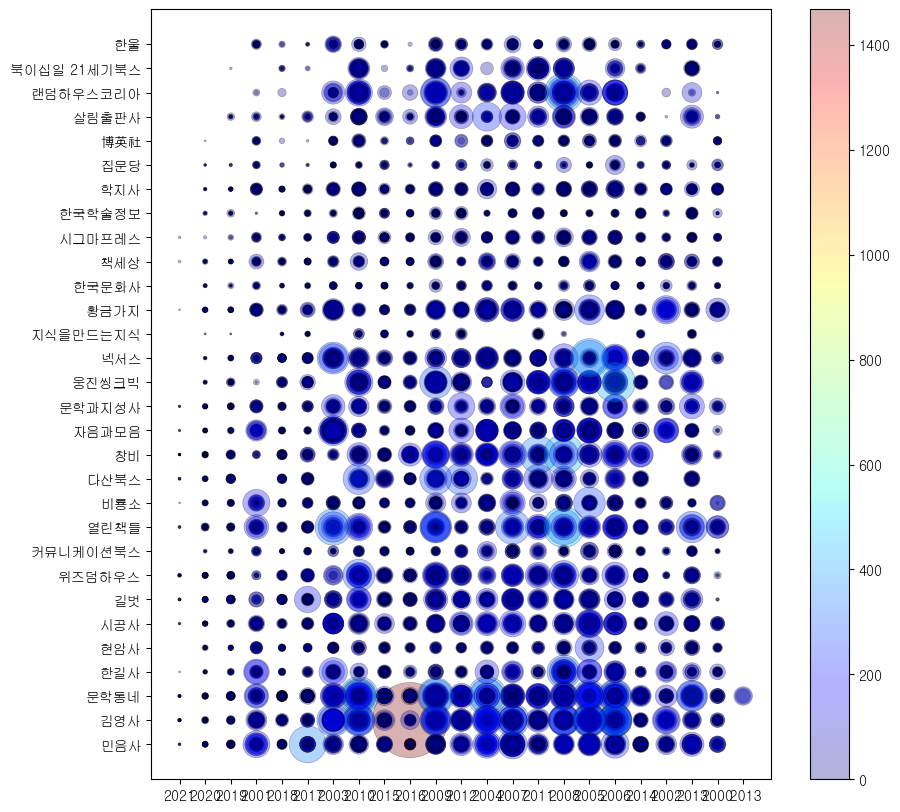

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
sc = ax.scatter(new_df3.발행년도,new_df3.출판사,s=new_df3.대출건수*2,linewidth=0.5,edgecolor='k',c=new_df3.대출건수,alpha=0.3,\
          cmap='jet')
fig.colorbar(sc)
fig.show()

In [56]:
# 제일 많이 대출된 출판사 5개 그래프로 그리기
df2 = df.copy()
df2

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401677,401678,韓國現代詩大系,채만묵 編著,한국문화사,1996,9788977352971,9788977352988.0,NaN,3,811.608,1,0,1970-01-01
401678,401679,뉴 웨이브,제임스 모나코 지음,한나래,1996,9788985367448,9788985367424.0,NaN,2,688.04,1,0,1970-01-01
401679,401680,(최인훈 장편소설)화두,최인훈 지음,민음사,1994,9788937401596,9788937401589.0,NaN,2,813.6,1,0,1970-01-01
401680,401681,독일 문학과 세계 문학,吳漢鎭 編著,벽호,1995,9788947700368,9788947700405.0,NaN,3,809.05,2,0,1970-01-01


In [57]:
# 제일 많이 대출된 출판사 5개 뽑아오기
T5 = df2.출판사.value_counts()[:5].index

In [58]:
# 잘못된 발행년도 제거하기
remove_idx = []
for idx, val in df2.발행년도.items():
    try:
        if int(val) < 1990 or int(val) > 2023:
            remove_idx.append(idx)
    except:
        remove_idx.append(idx)
df2.drop(remove_idx,0,inplace=True)

In [59]:
# 출판사 5개만 따로 저장하기
df2 = df2.loc[df2.출판사.isin(T5),:]

In [60]:
# 출판사와 발행년도 별로 묶기
df2 = df2.groupby(["출판사","발행년도"]).sum().대출건수.reset_index()

In [61]:
# 년도를 안겹치게 해서 따로 저장하기
unique_y = df2.발행년도.unique()

In [62]:
# 출판사 중에서 안겹치는 년도가 없는 출판사에 0의 값을 주기
for i in unique_y:
    for j in T5:
        if sum((df2.발행년도 == i) & (df2.출판사 == j)) < 1:
            tmpdf = pd.DataFrame([{"발행년도":i,"출판사":j,"대출건수":0}])
            df2 = pd.concat([df2,tmpdf])

In [87]:
tmp2 = df2.copy()
tmp2.발행년도 = tmp2.발행년도.astype(int)
tmp2 = tmp2.sort_values('발행년도')

In [89]:
df2 = tmp2.copy()

In [ ]:
# for문 이용해서 그래프 그리기

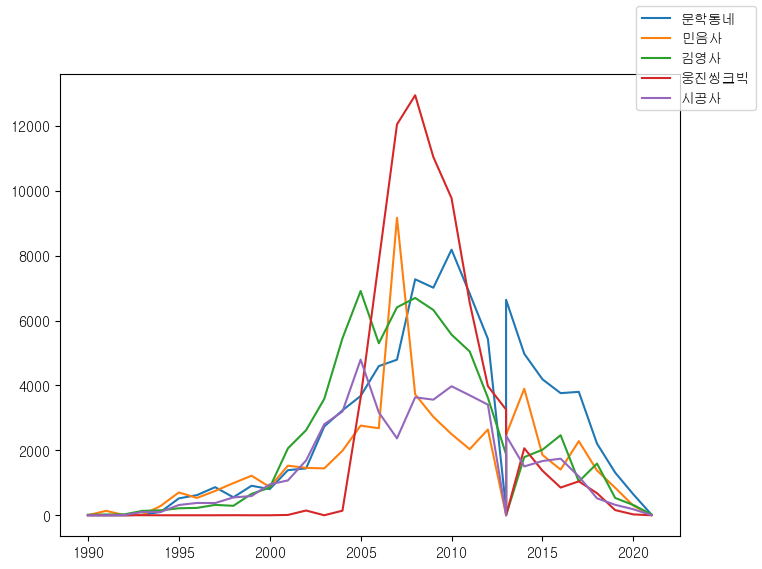

In [91]:
fig , ax = plt.subplots(figsize=(8,6))
for i in T5:
    x = df2.loc[df2.출판사 == i,"발행년도"]
    y = df2.loc[df2.출판사 == i,"대출건수"]
    label = i
    ax.plot(x,y,label=label)
fig.legend(loc='upper right') #loc으로 범례의 위치 조절 가능
fig.show()

In [ ]:
# 피벗 사용해서 원하는 컬럼을 인덱스, 컬럼으로 변환하기

In [92]:
date = np.datetime64('2023-01-01 00') + np.arange(1000)
val = np.random.randint(1,10,1000)

In [93]:
df = pd.DataFrame({'date':date,'usage':val})

In [98]:
df['day'] = df.date.astype(str).str[:10]
df['hour'] = df.date.astype(str).str[11:13]

In [99]:
df.drop(columns='date',inplace=True)

In [101]:
df = df[['day','hour','usage']]

In [105]:
df.pivot(index=['day'],columns=['hour'],values=['usage']).transpose()

day         2023-01-01  2023-01-02  2023-01-03  2023-01-04  2023-01-05  \
      hour                                                               
usage 00           2.0         2.0         7.0         3.0         6.0   
      01           4.0         6.0         4.0         2.0         7.0   
      02           9.0         8.0         7.0         2.0         5.0   
      03           1.0         3.0         7.0         2.0         8.0   
      04           3.0         7.0         1.0         6.0         5.0   
      05           4.0         2.0         7.0         6.0         5.0   
      06           6.0         3.0         1.0         8.0         9.0   
      07           5.0         5.0         2.0         5.0         3.0   
      08           8.0         2.0         6.0         6.0         2.0   
      09           5.0         1.0         1.0         7.0         1.0   
      10           6.0         5.0         5.0         7.0         1.0   
      11           2.0         3.0         6.0         7.0         7.0   
      12           7.0         7.0         9.0         3.0         6.0   
      13           4.0         4.0         4.0         3.0         8.0   
      14           5.0         2.0         9.0         9.0         3.0   
      15           4.0         8.0         4.0         8.0         9.0   
      16           4.0         2.0         9.0         4.0         4.0   
      17           1.0         3.0         7.0         8.0         3.0   
      18           2.0         9.0         5.0         7.0         4.0   
      19           6.0         7.0         6.0         9.0         5.0   
      20           2.0         8.0         1.0         2.0         6.0   
      21           7.0         9.0         6.0         7.0         6.0   
      22           3.0         8.0         2.0         5.0         2.0   
      23           8.0         5.0         3.0         6.0         5.0   

day         2023-01-06  2023-01-07  2023-01-08  2023-01-09  2023-01-10  ...  \
      hour                                                              ...   
usage 00           7.0         3.0         7.0         6.0         4.0  ...   
      01           7.0         4.0         9.0         4.0         5.0  ...   
      02           2.0         7.0         6.0         8.0         6.0  ...   
      03           6.0         9.0         1.0         5.0         9.0  ...   
      04           1.0         9.0         4.0         8.0         1.0  ...   
      05           7.0         2.0         2.0         9.0         8.0  ...   
      06           5.0         6.0         5.0         7.0         8.0  ...   
      07           4.0         9.0         7.0         1.0         2.0  ...   
      08           5.0         2.0         4.0         4.0         2.0  ...   
      09           2.0         9.0         8.0         8.0         5.0  ...   
      10           9.0         6.0         1.0         6.0         9.0  ...   
      11           6.0         3.0         6.0         2.0         4.0  ...   
      12           5.0         3.0         7.0         3.0         1.0  ...   
      13           3.0         7.0         9.0         5.0         6.0  ...   
      14           8.0         4.0         3.0         4.0         4.0  ...   
      15           3.0         1.0         2.0         3.0         7.0  ...   
      16           2.0         3.0         4.0         5.0         4.0  ...   
      17           1.0         1.0         2.0         8.0         3.0  ...   
      18           1.0         9.0         3.0         6.0         4.0  ...   
      19           3.0         6.0         7.0         9.0         7.0  ...   
      20           5.0         4.0         6.0         4.0         9.0  ...   
      21           2.0         6.0         5.0         6.0         8.0  ...   
      22           2.0         8.0         7.0         6.0         8.0  ...   
      23           6.0         9.0         2.0         7.0         6.0  ...   

day         2023-02-

In [ ]:
# 위에 만들었던 상위출판사 5개를 가지고 대출건수의 총합을 파이 그래프로 그리기

In [113]:
df2

,출판사,발행년도,대출건수
0,김영사,1990,16
64,민음사,1990,2
33,문학동네,1990,2
0,웅진씽크빅,1990,0
96,시공사,1990,1
...,...,...,...
63,문학동네,2021,18
0,웅진씽크빅,2021,0
95,민음사,2021,7
126,시공사,2021,5


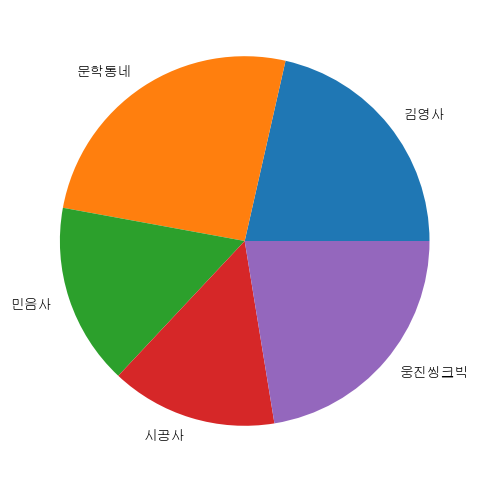

In [114]:
label = df2.groupby(['출판사']).sum().index
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(df2.groupby(['출판사']).sum().대출건수,labels=label)
fig.show()

In [ ]:
# 통계 관련 부분부터는 알아서 복습하기